## Comments Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

DATA_PATH = "C:/Users/doosti/Dropbox (Chapman)/Research/Research Projects/Fitness/Data/"

In [2]:
# Load the data
with open(os.path.join(DATA_PATH,"processed_comments_102423.txt"),"r", encoding="utf-8") as f:
    processed_docs = f.readlines()
comments = pd.read_csv(os.path.join(DATA_PATH, "merged_comments.csv"))
comments = comments[comments.comment_text.notnull()].copy()
comments['processed_text'] = [re.sub("\d+", "", x.strip())for x in processed_docs]
comments['length'] = comments.processed_text.apply(lambda x: len(x.split(',')))
comments['include'] = comments.length > 10
comments = comments[comments.include].copy()
print(comments.shape)

(221979, 11)


In [20]:
# Load the clustering and tsne results
version = "lowercase" # lowercase or tokens
# clusters by embeddings
clusters = pd.read_csv(os.path.join(DATA_PATH, f"comments_cluster_{version}.csv"))

# tsne results
tsne = pd.read_csv(os.path.join(DATA_PATH, f"tsne_{version}_perp50_n500.csv"))

In [ ]:
"""
# Visualize the clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Fit the model
pca.fit(embeddings)
X = pca.transform(embeddings)
print(X.shape)

# Plot the clusters
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab20')
plt.show()

# Get the top words in each cluster
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Get the top words in each cluster
def get_top_words(X, labels, n=10):
    # Get the top words in each cluster
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(X)
    tfidf = TfidfTransformer()
    X = tfidf.fit_transform(X)
    words = vectorizer.get_feature_names()
    clusters = np.unique(labels)
    top_words = []
    for cluster in clusters:
        # Get the indices of the cluster
        idx = np.where(labels == cluster)[0]
        # Get the words in the cluster
        cluster_words = X[idx,:].sum(axis=0).A1
        # Get the top words in the cluster
        top_idx = np.argsort(cluster_words)[::-1][:n]
        top_words.append([words[i] for i in top_idx])
    return top_words

top_words = get_top_words(comments.processed_text, labels, n=10)
for i, words in enumerate(top_words):
    print("Cluster {}: {}".format(i, words))
"""

In [21]:
# t-SNE
tsne.columns = ['tsne-2d-one', 'tsne-2d-two']
tsne['cluster_label'] = clusters['cluster'].values

C:\Users\doosti\AppData\Local\Temp\ipykernel_163764\3529782465.py:3: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


(-500.0, 500.0)

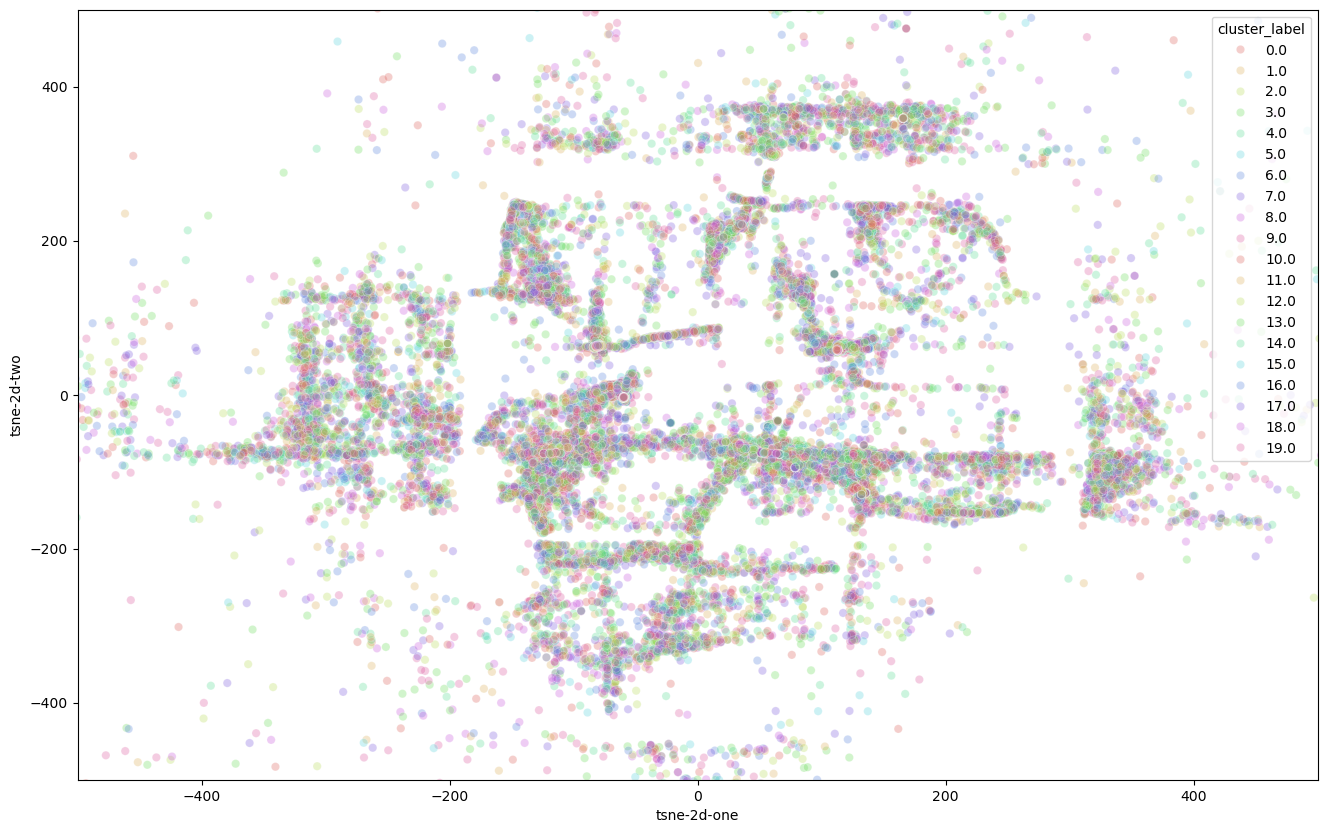

In [25]:
# tsne plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_label",  # change here
    data = tsne,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)
plt.xlim(-500, 500)
plt.ylim(-500, 500)


In [22]:
tsne.describe()

,tsne-2d-one,tsne-2d-two,cluster_label
count,221979.000000,221979.000000,63055.000000
mean,-0.238493,2.258443,9.430703
std,148.657996,154.829782,5.827702
min,-6068.824707,-2781.859375,0.000000
25%,-80.448376,-76.417282,4.000000
50%,-23.811138,-3.191319,9.000000
75%,112.743118,63.540379,14.000000
max,3607.370605,6177.666504,19.000000


In [29]:
for i in range(20):
    print('-'*50)
    print(i)
    print(clusters[clusters.cluster == i].comment_text.sample(10).values)

--------------------------------------------------
0
['🌞✨🌹✨🌞✨🌞🌹🌹bom dia 🌸 pra você princesa você e linda linda linda linda beijos ✨🌹🌸✨🌸✨🌸✨🌸🌹'
 "found myself waking up in a lot of pain and pushed myself to return to yoga. i've visited your videos before when i've had trouble concentrating for my final exams in the past couple of years, but practicing with you and being very present today made me realize the amount of mental pain i am in. i'm committing myself to start practicing daily to really be more present with my body and mind. thank you for this practice and your encouraging presence."
 "Oh, Adriene, I truly hope you read this.  I have done, successfully, pretty much, two of your 30 day challenges in the past, but in the last few years, have fallen away, and fallen, again, which left me with hardware in my left wrist, to match my left ankle, and being 63, and having that, missing cartilege in my right knee, and compression fractures, hence, discs, in my back, I am not nearly as ag